In [144]:
import pandas as pd
import numpy as np
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
df = pd.read_csv('data/forestfires.csv')
df.tail()
# 13 cols 517 rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [146]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [148]:
df1=df

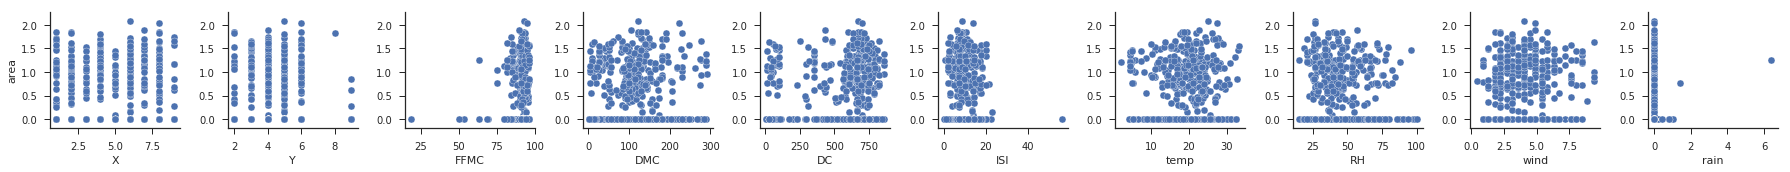

In [152]:
g = sb.pairplot(data=df1,y_vars=['area'],x_vars=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain'])
plt.show(g)

In [157]:
df1['area']= np.log(1+df['area'])

In [159]:
df1.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


In [176]:
df1.drop(['month','day'], axis = 1, inplace = True)
df1.tail()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


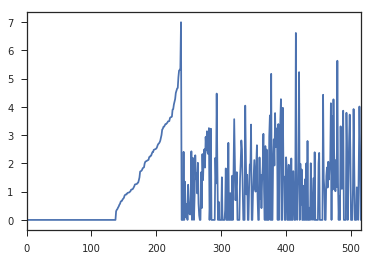

In [177]:
df1['area'].plot()

In [178]:
dfsorted=df1.sort_values(['area'])

In [192]:
desc=dfsorted.describe()
desc2=desc.T
desc2['median']=df1.median()
desc2['range']=df1.max() - df1.min()
desc2['IQR']=df1.quantile(0.75)-df1.quantile(0.25)

desc2.drop(['count','std','min','max','50%'], axis = 1, inplace = True)


In [198]:
desc2

,mean,25%,75%,median,range,IQR
X,4.658252,3.00,7.000000,4.000000,8.00000,4.000000
Y,4.297087,4.00,5.000000,4.000000,7.00000,1.000000
FFMC,90.642718,90.20,92.900000,91.600000,77.50000,2.700000
DMC,111.153398,70.25,142.400000,108.300000,290.20000,72.150000
DC,548.583689,439.30,713.900000,664.200000,852.70000,274.600000
ISI,9.026214,6.45,10.900000,8.400000,56.10000,4.450000
temp,18.918058,15.60,22.800000,19.300000,31.10000,7.200000
RH,44.207767,32.50,53.000000,42.000000,85.00000,20.500000
wind,4.022913,2.70,4.900000,4.000000,9.00000,2.200000
rain,0.021359,0.00,0.000000,0.000000,6.40000,0.000000
